#IBM HR Analytics Employee Attrition & Performance
Mustafiz Ahmed UMID05072548678

In [1]:
# I'm mounting my Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# I'm importing all the required libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# I'm ignoring warnings to keep the output clean
warnings.filterwarnings('ignore')

# I'm setting pandas display options to show all columns
pd.set_option('display.max_columns', 35)

print("All libraries imported successfully!")

All libraries imported successfully!


In [7]:
# I'm loading the IBM HR dataset from my Google Drive folder
df = pd.read_csv('/content/drive/MyDrive/UM_IBM_HR/ibmhr.csv')

# I'm displaying the first few rows to understand the data structure
print(f"\nDataset Shape: {df.shape}")
df.head()


Dataset Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# I'm checking the data types and general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Checking for duplicate rows
print(f'Number of duplicated rows: {df.duplicated().sum()}')

# Checking for missing values
print(f'\nMissing values:\n{df.isnull().sum().sum()}')

Number of duplicated rows: 0

Missing values:
0


In [8]:
# Getting statistical summary of numerical columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Checking unique values in object type columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f'{col}: {df[col].unique()}')
    print()

Attrition: ['Yes' 'No']

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: ['Sales' 'Research & Development' 'Human Resources']

EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: ['Female' 'Male']

JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus: ['Single' 'Married' 'Divorced']

Over18: ['Y']

OverTime: ['Yes' 'No']



In [10]:
# Calculating the attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True)
print('Attrition Distribution:')
print(attrition_rate)
print(f'\nAttrition Rate: {attrition_rate["Yes"]*100:.2f}%')

Attrition Distribution:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

Attrition Rate: 16.12%


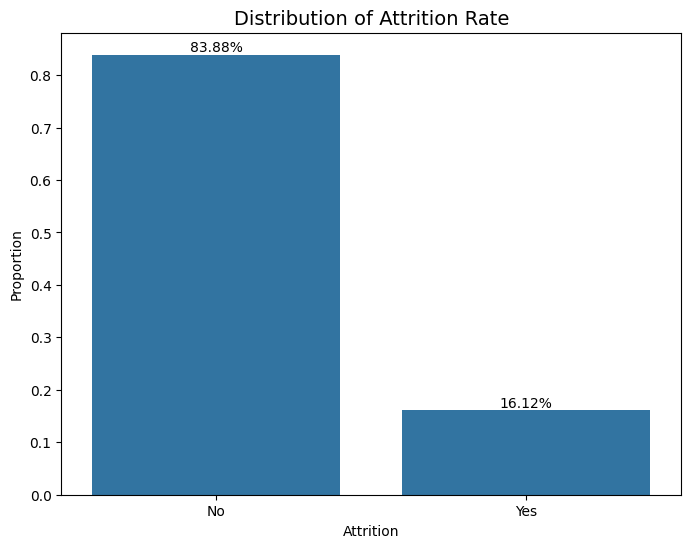

In [11]:
# Visualizing the attrition distribution
plt.figure(figsize=(8,6))
ax = sns.barplot(x=attrition_rate.index, y=attrition_rate.values)

# Adding percentage labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{attrition_rate.values[i]*100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Distribution of Attrition Rate', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Proportion')
plt.show()

In [12]:
# Calculating average tenure at the company
avg_tenure = df['YearsAtCompany'].mean()
print(f'Average years at company: {avg_tenure:.2f} years')

Average years at company: 7.01 years


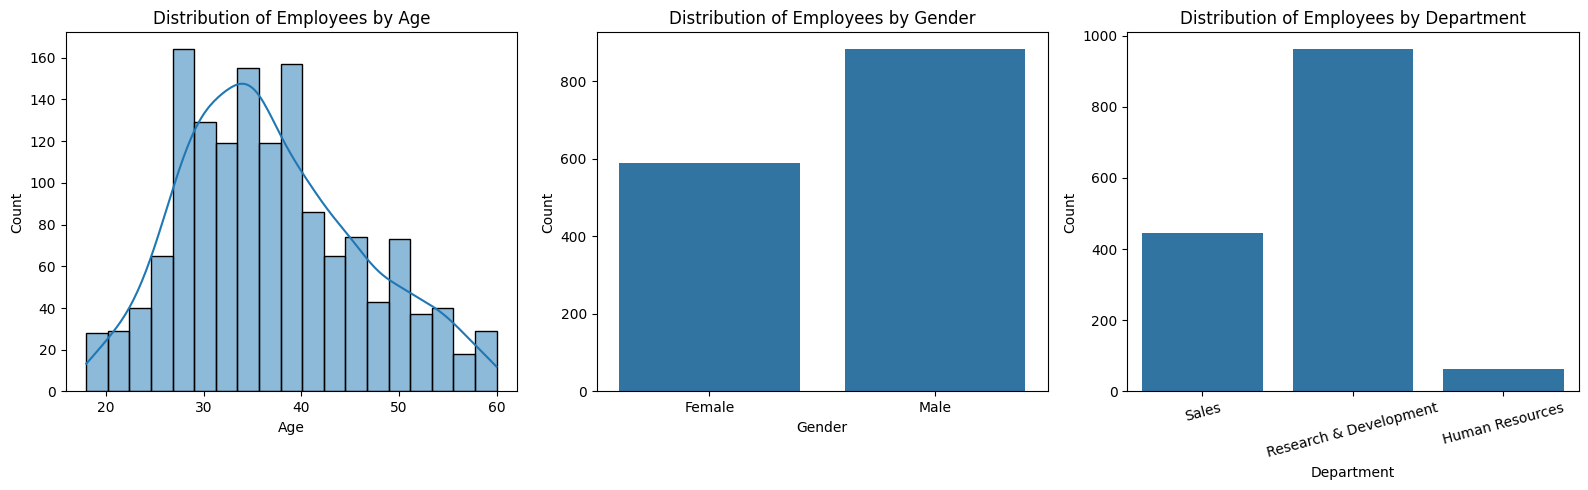

In [13]:
# Visualizing employee demographics
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

# Age distribution
sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Employees by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Gender distribution
sns.countplot(data=df, x='Gender', ax=axes[1])
axes[1].set_title('Distribution of Employees by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Department distribution
sns.countplot(data=df, x='Department', ax=axes[2])
axes[2].set_title('Distribution of Employees by Department')
axes[2].set_xlabel('Department')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

In [14]:
# Creating a separate dataframe for employees who left
df_attrition = df[df['Attrition'] == 'Yes']
print(f'Total employees who left: {len(df_attrition)}')
print(f'\nFirst few rows:')
df_attrition.head()

Total employees who left: 237

First few rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


In [15]:
# Function to calculate attrition rate by any category
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

print('Function created successfully!')

Function created successfully!


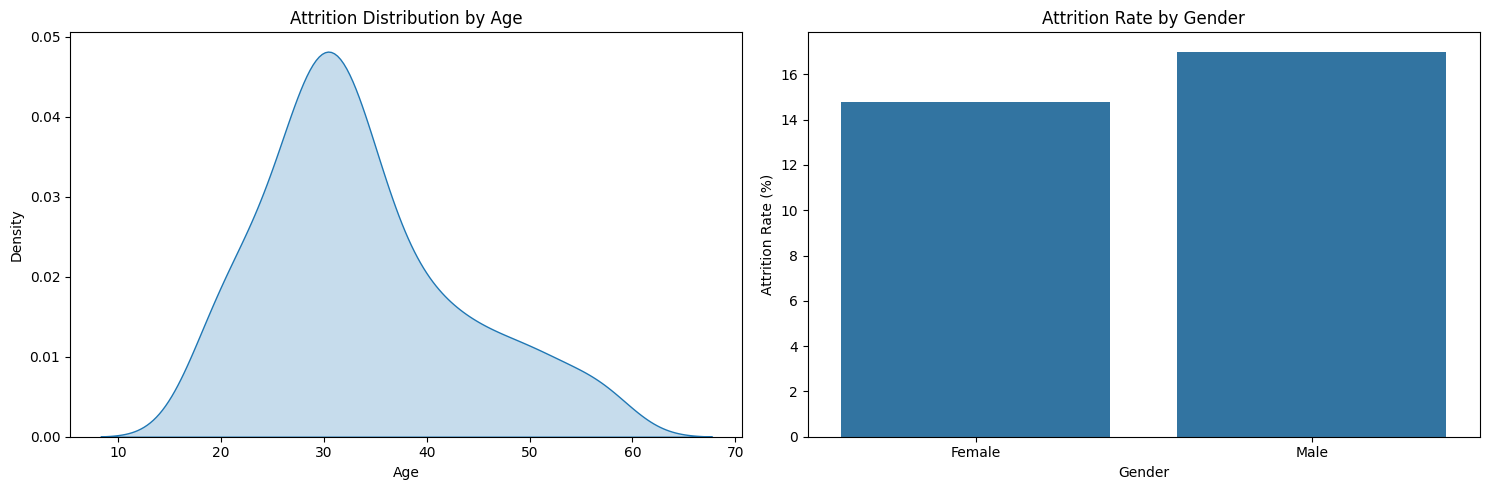

In [16]:
# Analyzing attrition by age and gender
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Age distribution for employees who left
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition Distribution by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Attrition rate by gender
attrition_rate_gender = calculate_attrition_rate(df, 'Gender')
sns.barplot(data=attrition_rate_gender, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

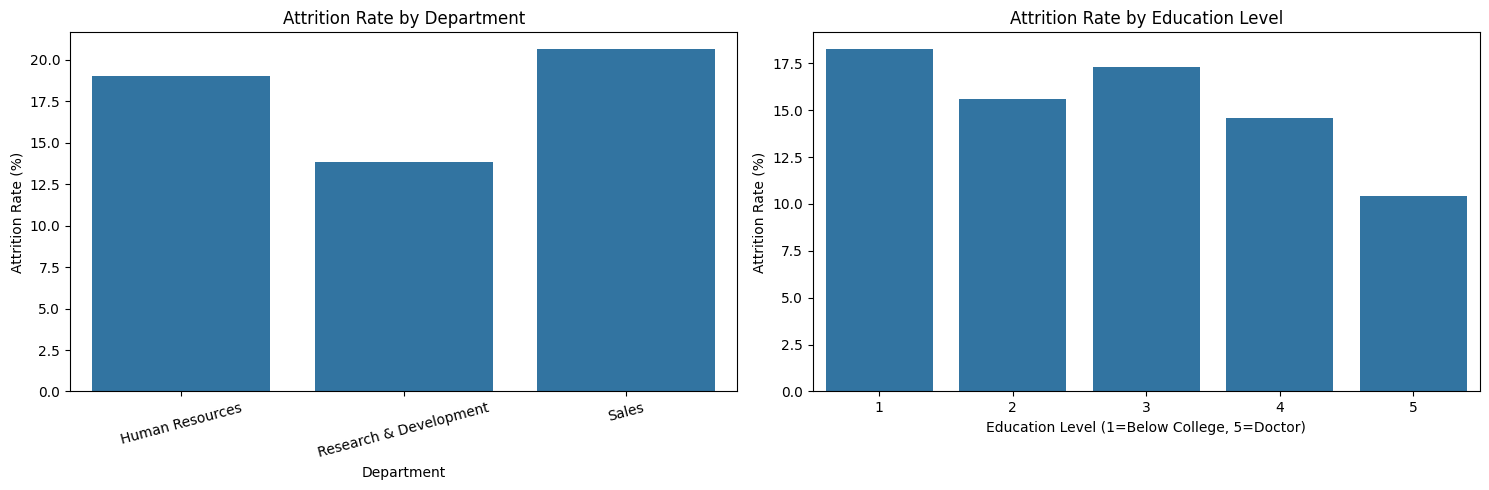

In [17]:
# Analyzing attrition by department and education
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Attrition rate by department
attrition_rate_dept = calculate_attrition_rate(df, 'Department')
sns.barplot(data=attrition_rate_dept, x='Department', y='AttritionRate', ax=axes[0])
axes[0].set_title('Attrition Rate by Department')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Attrition Rate (%)')
axes[0].tick_params(axis='x', rotation=15)

# Attrition rate by education level
attrition_rate_edu = calculate_attrition_rate(df, 'Education')
sns.barplot(data=attrition_rate_edu, x='Education', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by Education Level')
axes[1].set_xlabel('Education Level (1=Below College, 5=Doctor)')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

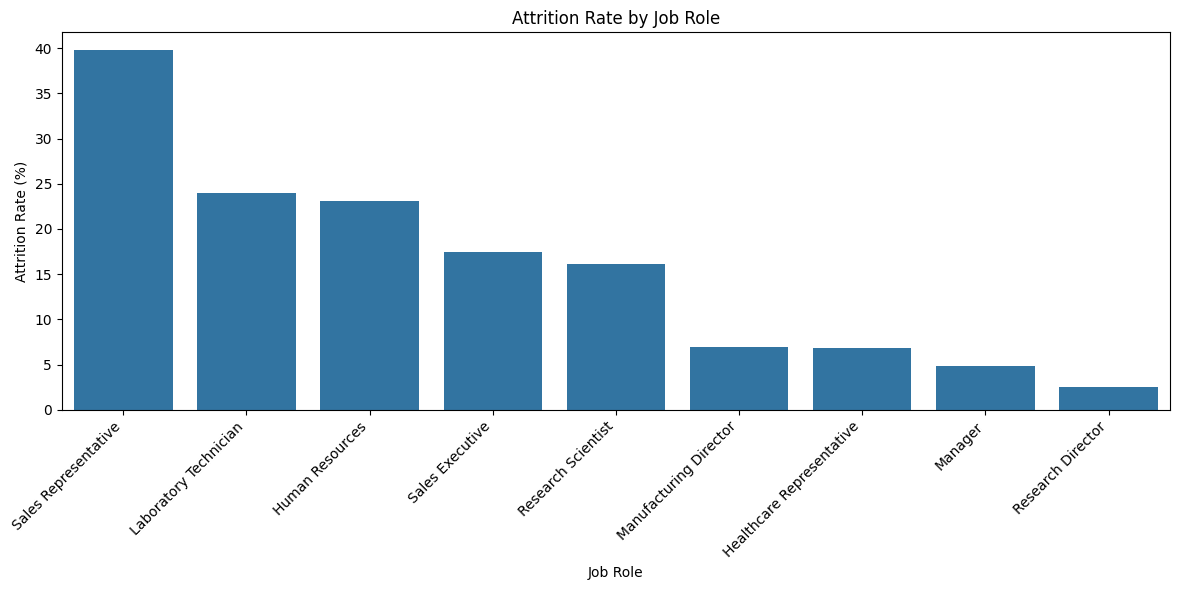

In [18]:
# Analyzing attrition rate by job role
attrition_rate_role = calculate_attrition_rate(df, 'JobRole')
attrition_rate_role = attrition_rate_role.sort_values('AttritionRate', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=attrition_rate_role, x='JobRole', y='AttritionRate')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

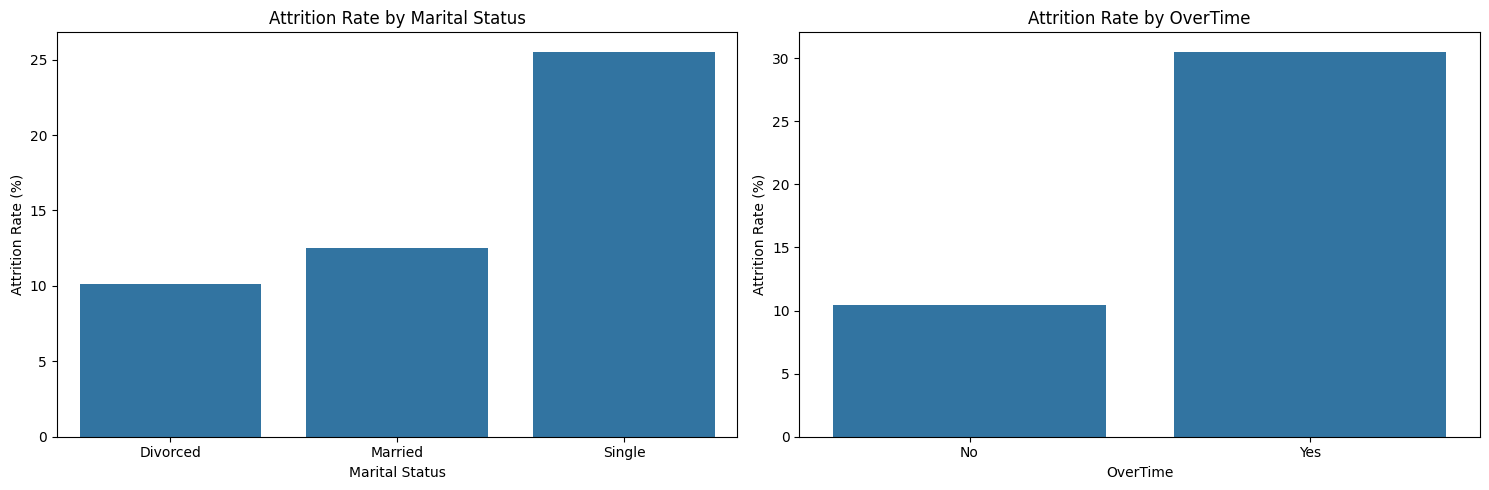

In [19]:
# Analyzing attrition by marital status and overtime
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Attrition rate by marital status
attrition_rate_marital = calculate_attrition_rate(df, 'MaritalStatus')
sns.barplot(data=attrition_rate_marital, x='MaritalStatus', y='AttritionRate', ax=axes[0])
axes[0].set_title('Attrition Rate by Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Attrition Rate (%)')

# Attrition rate by overtime
attrition_rate_overtime = calculate_attrition_rate(df, 'OverTime')
sns.barplot(data=attrition_rate_overtime, x='OverTime', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by OverTime')
axes[1].set_xlabel('OverTime')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

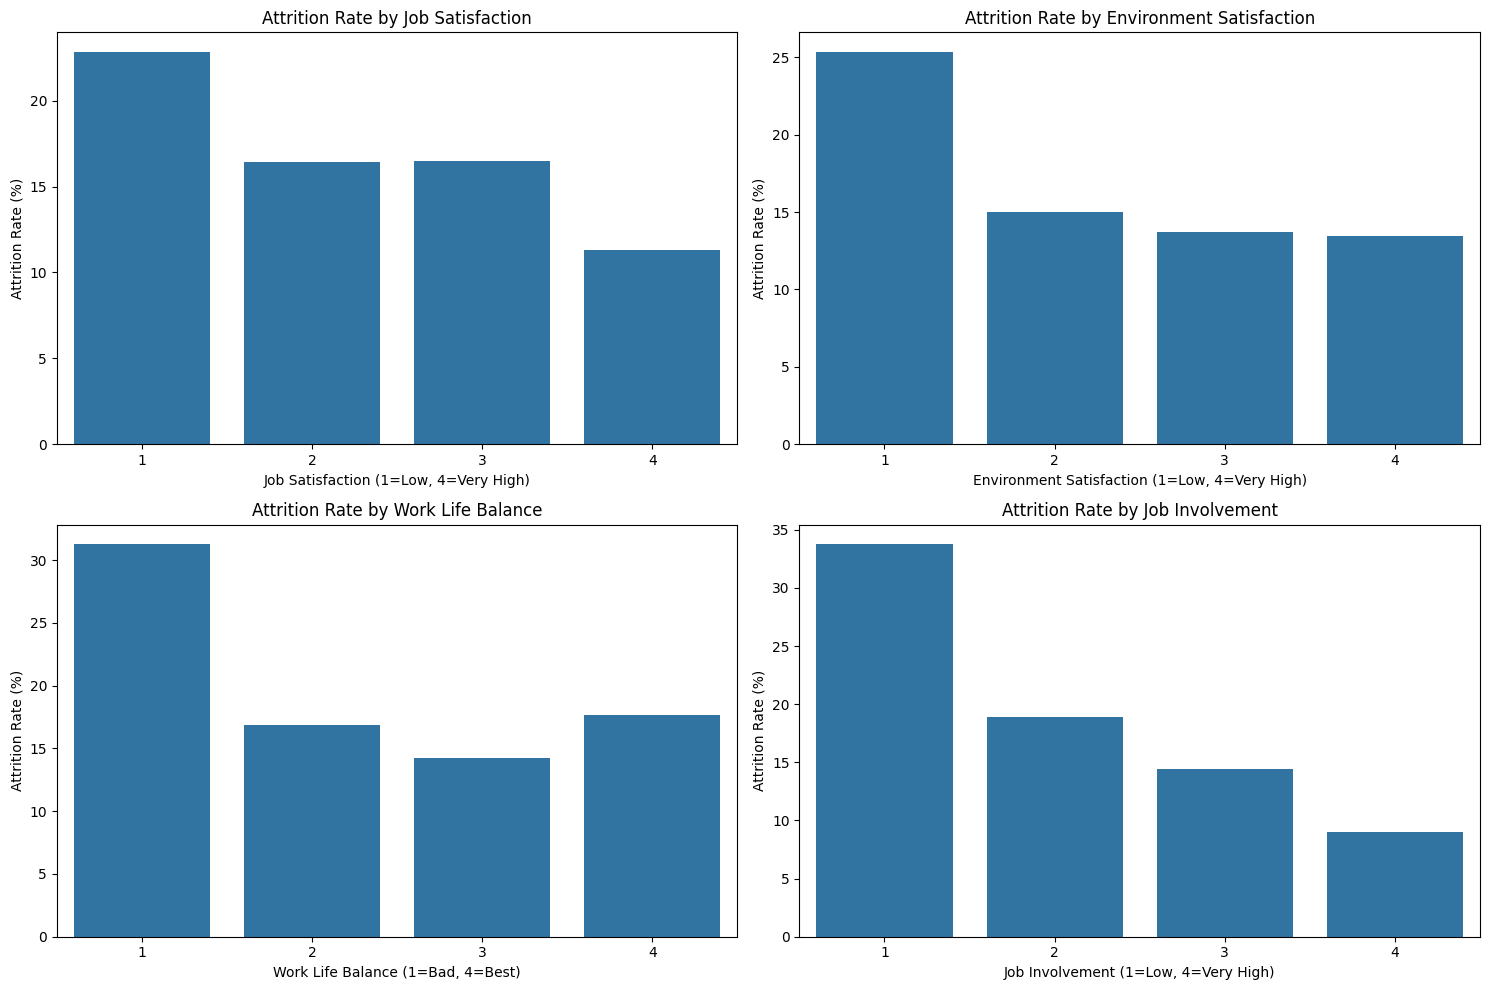

In [20]:
# Analyzing attrition by satisfaction factors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Job satisfaction
attrition_rate_jobsat = calculate_attrition_rate(df, 'JobSatisfaction')
sns.barplot(data=attrition_rate_jobsat, x='JobSatisfaction', y='AttritionRate', ax=axes[0,0])
axes[0,0].set_title('Attrition Rate by Job Satisfaction')
axes[0,0].set_xlabel('Job Satisfaction (1=Low, 4=Very High)')
axes[0,0].set_ylabel('Attrition Rate (%)')

# Environment satisfaction
attrition_rate_envsat = calculate_attrition_rate(df, 'EnvironmentSatisfaction')
sns.barplot(data=attrition_rate_envsat, x='EnvironmentSatisfaction', y='AttritionRate', ax=axes[0,1])
axes[0,1].set_title('Attrition Rate by Environment Satisfaction')
axes[0,1].set_xlabel('Environment Satisfaction (1=Low, 4=Very High)')
axes[0,1].set_ylabel('Attrition Rate (%)')

# Work life balance
attrition_rate_wlb = calculate_attrition_rate(df, 'WorkLifeBalance')
sns.barplot(data=attrition_rate_wlb, x='WorkLifeBalance', y='AttritionRate', ax=axes[1,0])
axes[1,0].set_title('Attrition Rate by Work Life Balance')
axes[1,0].set_xlabel('Work Life Balance (1=Bad, 4=Best)')
axes[1,0].set_ylabel('Attrition Rate (%)')

# Job involvement
attrition_rate_jobinv = calculate_attrition_rate(df, 'JobInvolvement')
sns.barplot(data=attrition_rate_jobinv, x='JobInvolvement', y='AttritionRate', ax=axes[1,1])
axes[1,1].set_title('Attrition Rate by Job Involvement')
axes[1,1].set_xlabel('Job Involvement (1=Low, 4=Very High)')
axes[1,1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

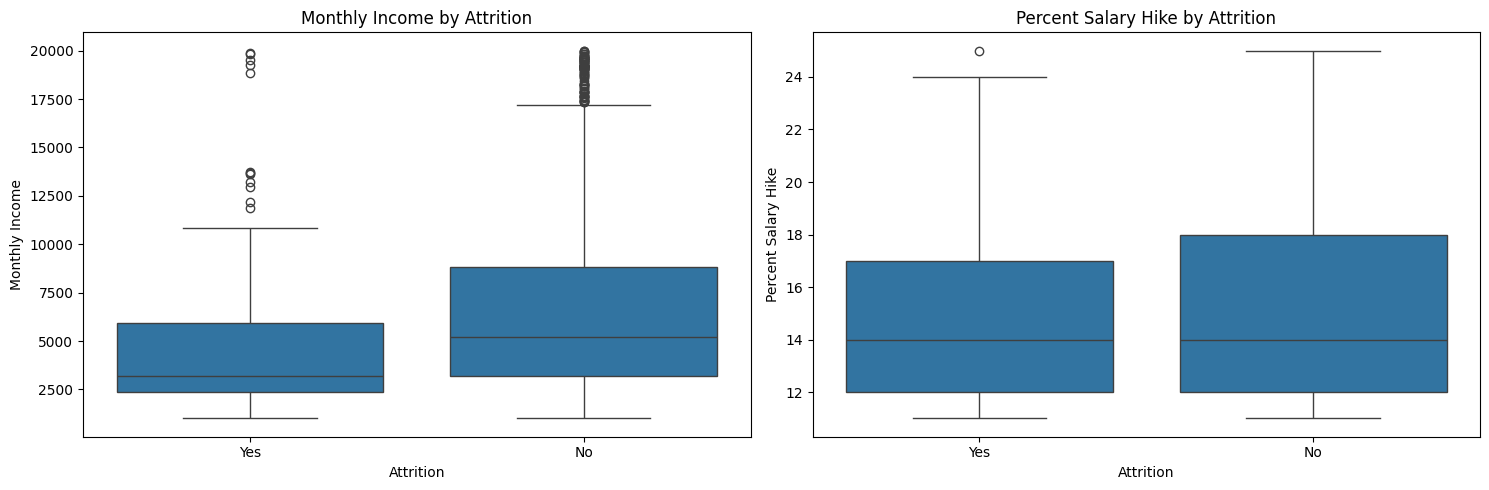

In [21]:
# Analyzing attrition by income and salary factors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Monthly income comparison
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0])
axes[0].set_title('Monthly Income by Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Monthly Income')

# Percent salary hike comparison
sns.boxplot(data=df, x='Attrition', y='PercentSalaryHike', ax=axes[1])
axes[1].set_title('Percent Salary Hike by Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Percent Salary Hike')

plt.tight_layout()
plt.show()

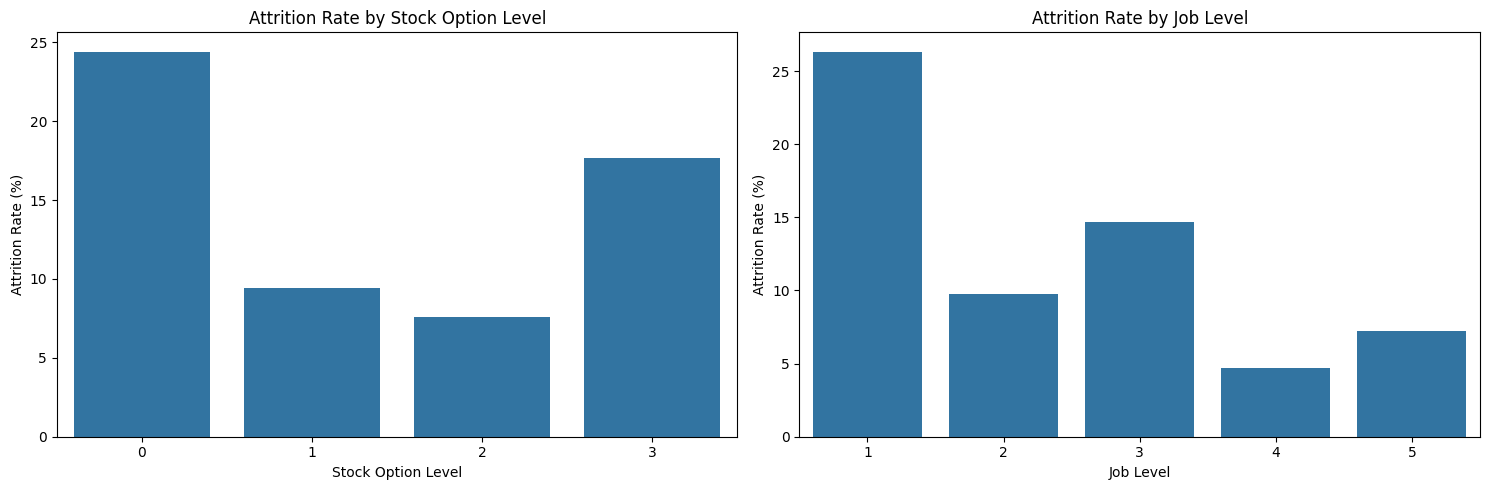

In [22]:
# Analyzing attrition by stock options and job level
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Attrition rate by stock option level
attrition_rate_stock = calculate_attrition_rate(df, 'StockOptionLevel')
sns.barplot(data=attrition_rate_stock, x='StockOptionLevel', y='AttritionRate', ax=axes[0])
axes[0].set_title('Attrition Rate by Stock Option Level')
axes[0].set_xlabel('Stock Option Level')
axes[0].set_ylabel('Attrition Rate (%)')

# Attrition rate by job level
attrition_rate_joblevel = calculate_attrition_rate(df, 'JobLevel')
sns.barplot(data=attrition_rate_joblevel, x='JobLevel', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by Job Level')
axes[1].set_xlabel('Job Level')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

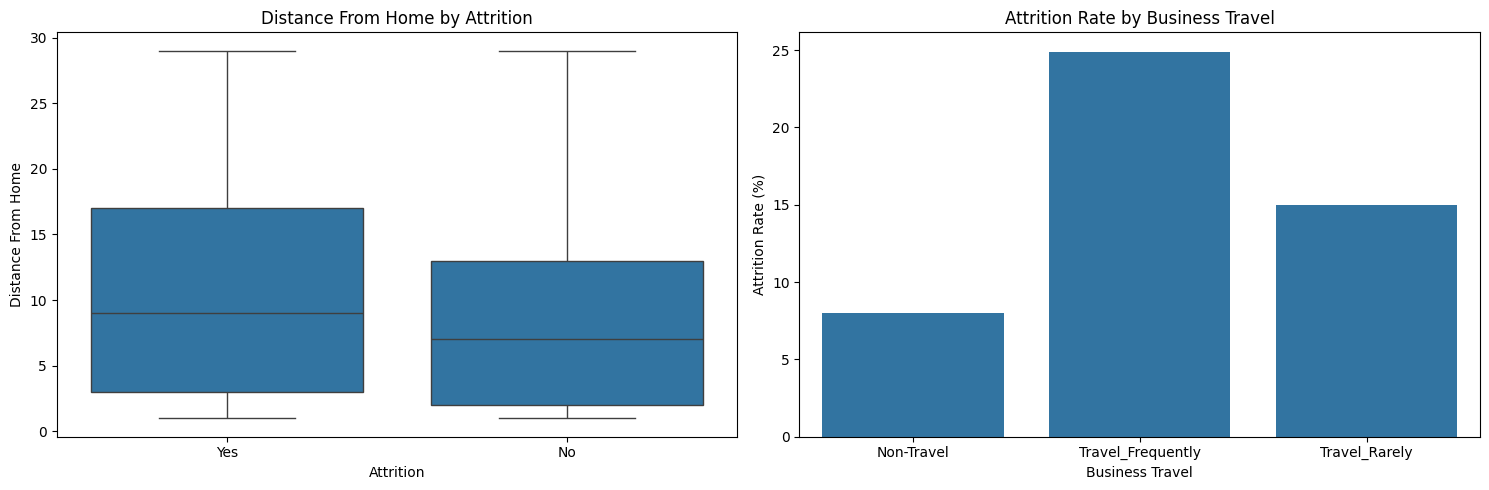

In [23]:
# Analyzing attrition by distance from home and business travel
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Distance from home comparison
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', ax=axes[0])
axes[0].set_title('Distance From Home by Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Distance From Home')

# Attrition rate by business travel
attrition_rate_travel = calculate_attrition_rate(df, 'BusinessTravel')
sns.barplot(data=attrition_rate_travel, x='BusinessTravel', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by Business Travel')
axes[1].set_xlabel('Business Travel')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

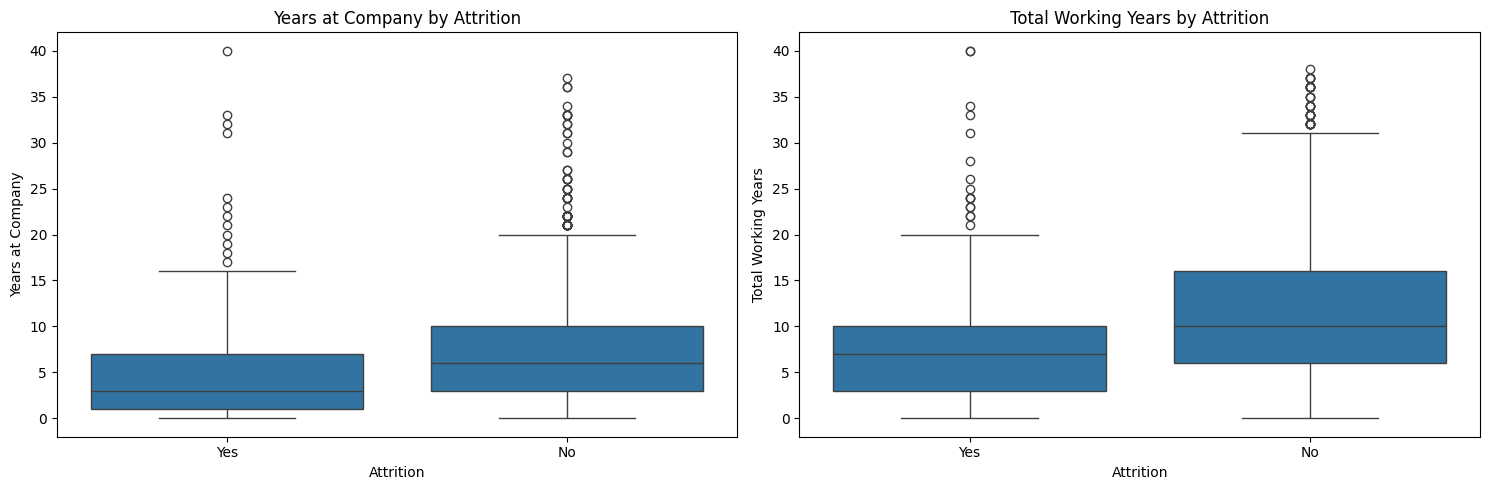

In [24]:
# Analyzing attrition by tenure-related factors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Years at company comparison
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', ax=axes[0])
axes[0].set_title('Years at Company by Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Years at Company')

# Total working years comparison
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears', ax=axes[1])
axes[1].set_title('Total Working Years by Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Total Working Years')

plt.tight_layout()
plt.show()

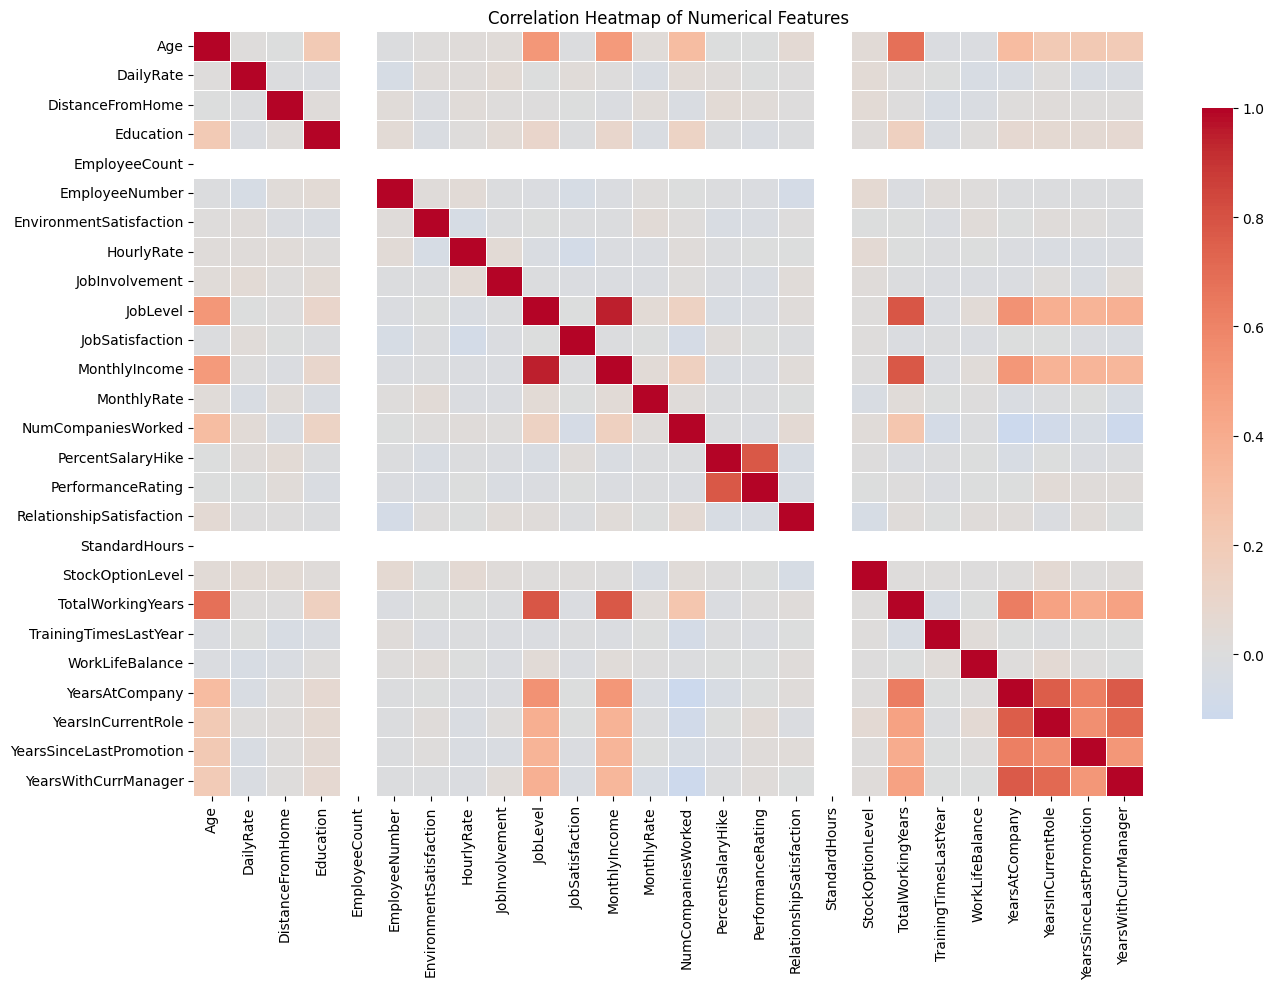

In [25]:
# Creating correlation heatmap for numerical features
plt.figure(figsize=(14,10))

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

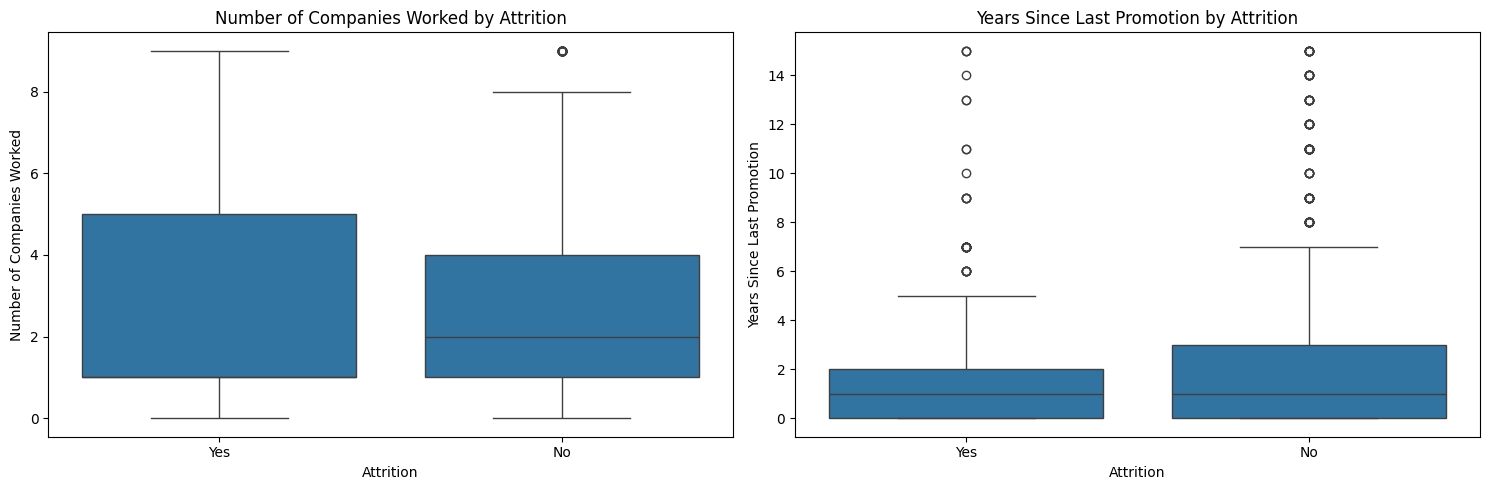

In [26]:
# Analyzing attrition by career mobility factors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Number of companies worked comparison
sns.boxplot(data=df, x='Attrition', y='NumCompaniesWorked', ax=axes[0])
axes[0].set_title('Number of Companies Worked by Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Number of Companies Worked')

# Years since last promotion comparison
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion', ax=axes[1])
axes[1].set_title('Years Since Last Promotion by Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Years Since Last Promotion')

plt.tight_layout()
plt.show()

In [27]:
# Comparing key metrics between attrition groups
comparison_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears',
                   'DistanceFromHome', 'NumCompaniesWorked', 'YearsSinceLastPromotion']

summary_stats = df.groupby('Attrition')[comparison_cols].mean().round(2)
print('Average values by Attrition Status:')
print(summary_stats)

Average values by Attrition Status:
             Age  MonthlyIncome  YearsAtCompany  TotalWorkingYears  \
Attrition                                                            
No         37.56        6832.74            7.37              11.86   
Yes        33.61        4787.09            5.13               8.24   

           DistanceFromHome  NumCompaniesWorked  YearsSinceLastPromotion  
Attrition                                                                 
No                     8.92                2.65                     2.23  
Yes                   10.63                2.94                     1.95  


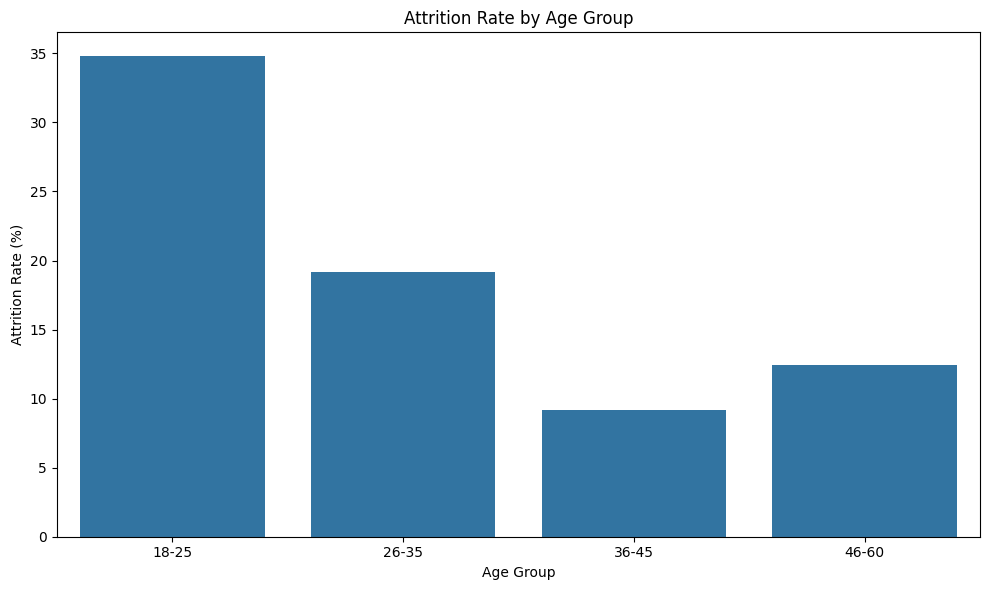

In [28]:
# Creating age groups for better analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60],
                        labels=['18-25', '26-35', '36-45', '46-60'])

# Calculating attrition rate by age group
attrition_rate_age = calculate_attrition_rate(df, 'AgeGroup')

plt.figure(figsize=(10,6))
sns.barplot(data=attrition_rate_age, x='AgeGroup', y='AttritionRate')
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

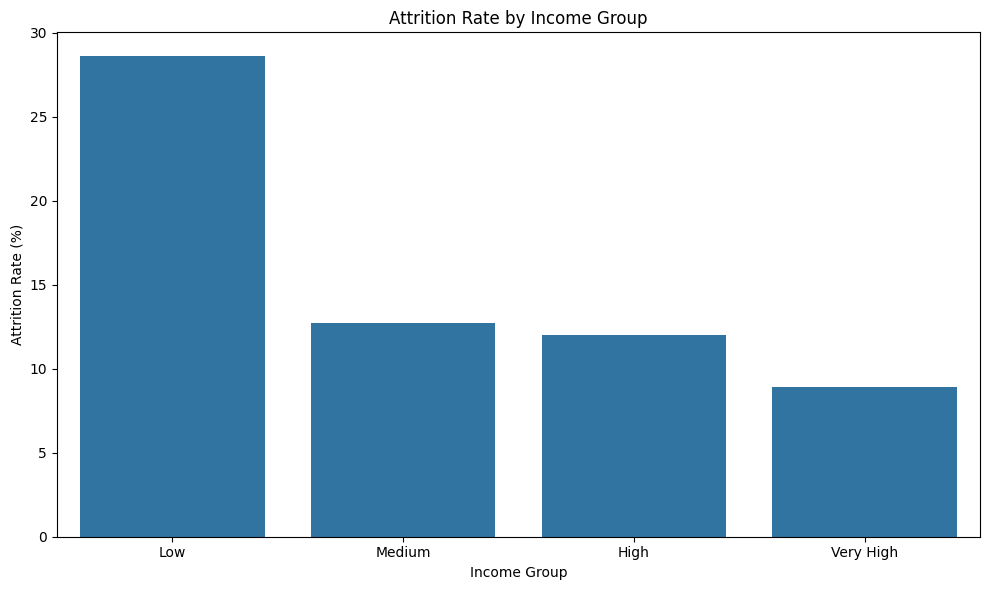

In [29]:
# Creating income groups for better analysis
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=[0, 3000, 6000, 10000, 20000],
                            labels=['Low', 'Medium', 'High', 'Very High'])

# Calculating attrition rate by income group
attrition_rate_income = calculate_attrition_rate(df, 'IncomeGroup')

plt.figure(figsize=(10,6))
sns.barplot(data=attrition_rate_income, x='IncomeGroup', y='AttritionRate')
plt.title('Attrition Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Attrition Rate (%)')
plt.tight_layout()
plt.show()

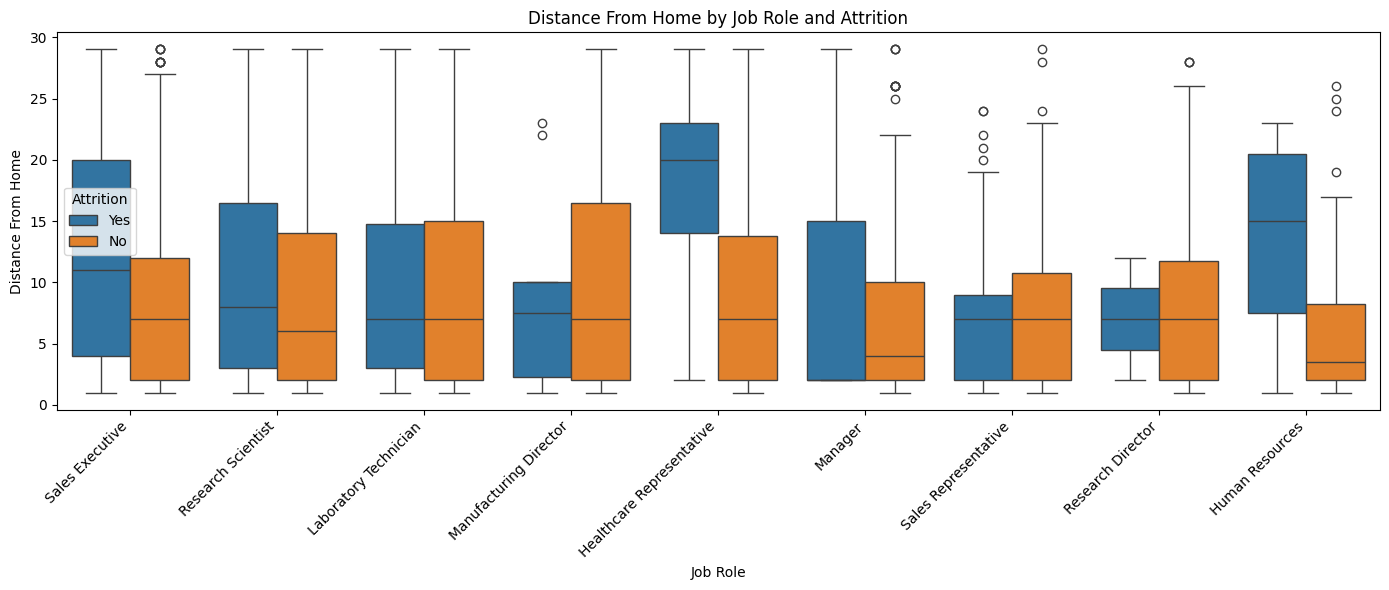

In [30]:
# Analyzing distance from home by job role and attrition
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='JobRole', y='DistanceFromHome', hue='Attrition')
plt.title('Distance From Home by Job Role and Attrition')
plt.xlabel('Job Role')
plt.ylabel('Distance From Home')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

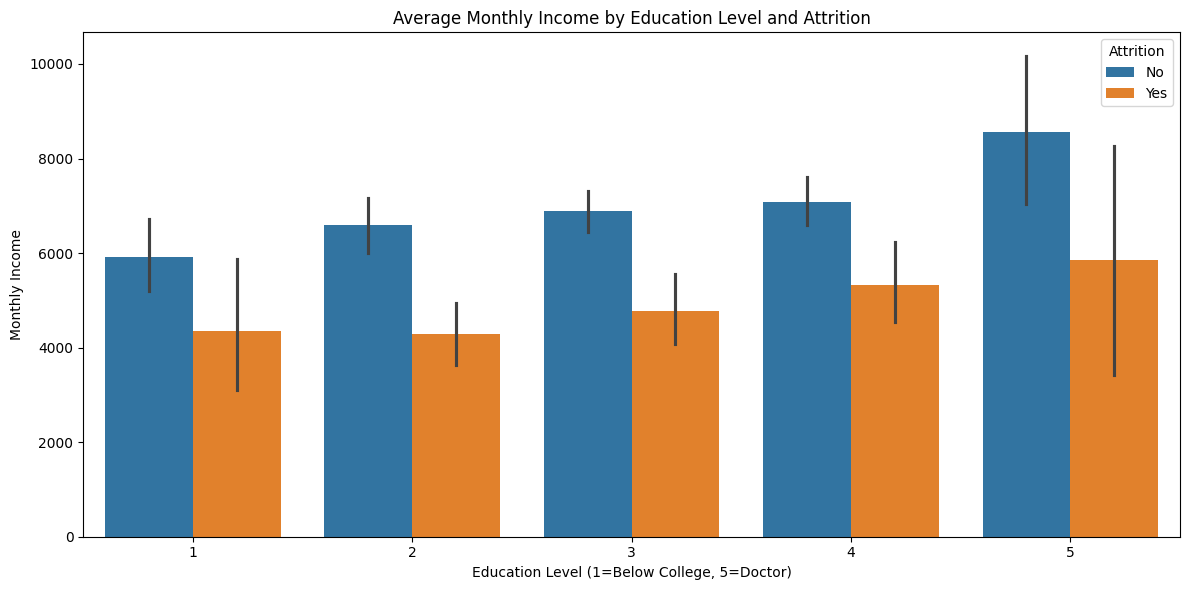

In [31]:
# Comparing monthly income by education level and attrition
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Average Monthly Income by Education Level and Attrition')
plt.xlabel('Education Level (1=Below College, 5=Doctor)')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

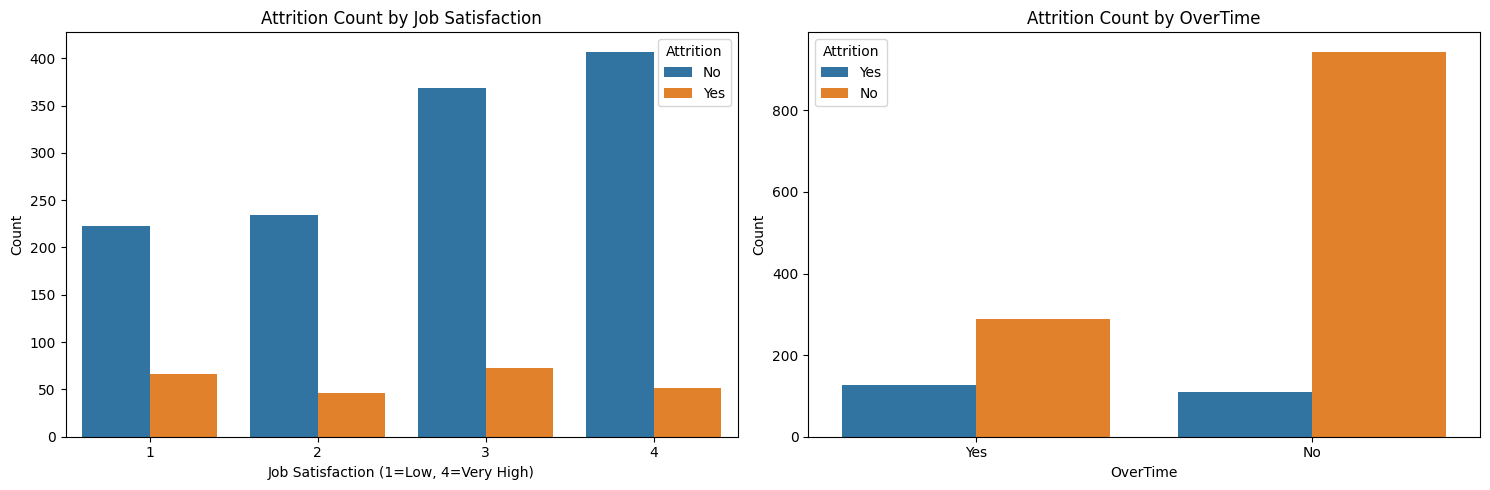

In [32]:
# Analyzing the combined effect of overtime and job satisfaction
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Count plot of attrition by overtime and job satisfaction
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', ax=axes[0])
axes[0].set_title('Attrition Count by Job Satisfaction')
axes[0].set_xlabel('Job Satisfaction (1=Low, 4=Very High)')
axes[0].set_ylabel('Count')
axes[0].legend(title='Attrition')

# Count plot of attrition by overtime
sns.countplot(data=df, x='OverTime', hue='Attrition', ax=axes[1])
axes[1].set_title('Attrition Count by OverTime')
axes[1].set_xlabel('OverTime')
axes[1].set_ylabel('Count')
axes[1].legend(title='Attrition')

plt.tight_layout()
plt.show()

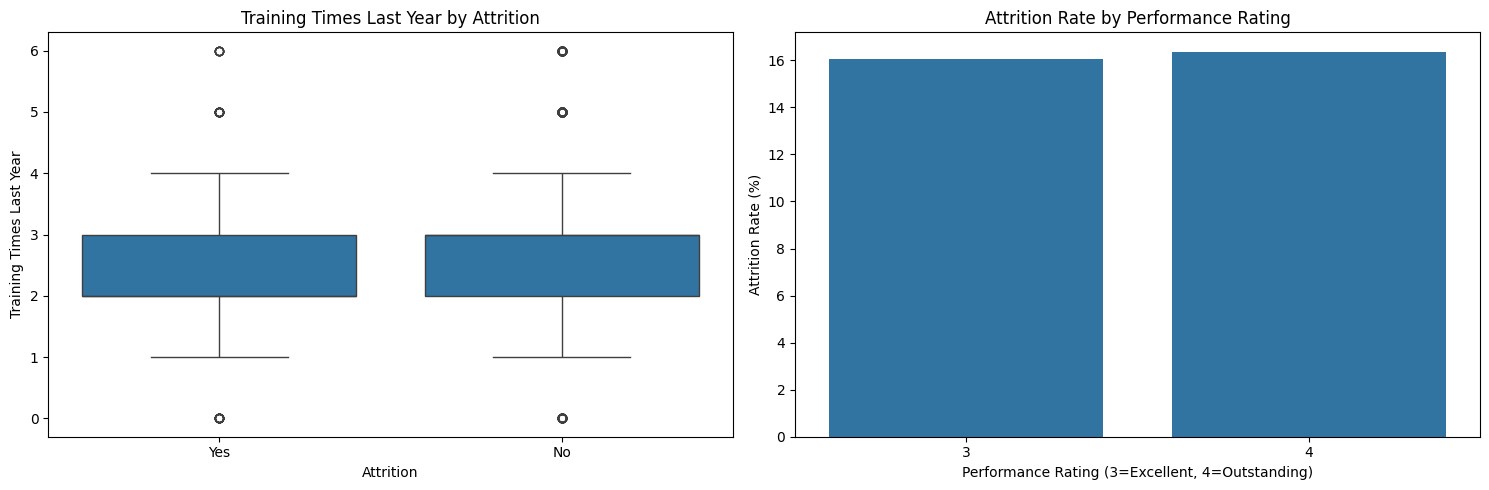

In [33]:
# Analyzing training and performance factors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Training times last year by attrition
sns.boxplot(data=df, x='Attrition', y='TrainingTimesLastYear', ax=axes[0])
axes[0].set_title('Training Times Last Year by Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Training Times Last Year')

# Performance rating by attrition
attrition_rate_perf = calculate_attrition_rate(df, 'PerformanceRating')
sns.barplot(data=attrition_rate_perf, x='PerformanceRating', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by Performance Rating')
axes[1].set_xlabel('Performance Rating (3=Excellent, 4=Outstanding)')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

In [34]:
# Summarizing key findings from the analysis
print('KEY FINDINGS FROM HR ATTRITION ANALYSIS')
print('='*60)

print('\n1. OVERALL ATTRITION:')
print(f'   - Attrition Rate: {attrition_rate["Yes"]*100:.2f}%')
print(f'   - Total Employees Left: {len(df_attrition)}')
print(f'   - Average Tenure: {avg_tenure:.2f} years')

print('\n2. DEMOGRAPHIC INSIGHTS:')
age_left = df_attrition['Age'].mean()
age_stayed = df[df['Attrition']=='No']['Age'].mean()
print(f'   - Average age of employees who left: {age_left:.2f} years')
print(f'   - Average age of employees who stayed: {age_stayed:.2f} years')

print('\n3. INCOME INSIGHTS:')
income_left = df_attrition['MonthlyIncome'].mean()
income_stayed = df[df['Attrition']=='No']['MonthlyIncome'].mean()
print(f'   - Average income of employees who left: ${income_left:.2f}')
print(f'   - Average income of employees who stayed: ${income_stayed:.2f}')
print(f'   - Income difference: ${income_stayed - income_left:.2f}')

print('\n4. WORK-LIFE BALANCE:')
overtime_yes = df[df['OverTime']=='Yes']['Attrition'].value_counts(normalize=True)['Yes']*100
overtime_no = df[df['OverTime']=='No']['Attrition'].value_counts(normalize=True)['Yes']*100
print(f'   - Attrition rate with overtime: {overtime_yes:.2f}%')
print(f'   - Attrition rate without overtime: {overtime_no:.2f}%')

print('\n5. JOB SATISFACTION:')
low_sat = df[df['JobSatisfaction']==1]['Attrition'].value_counts(normalize=True)['Yes']*100
high_sat = df[df['JobSatisfaction']==4]['Attrition'].value_counts(normalize=True)['Yes']*100
print(f'   - Attrition rate with low job satisfaction: {low_sat:.2f}%')
print(f'   - Attrition rate with very high job satisfaction: {high_sat:.2f}%')

KEY FINDINGS FROM HR ATTRITION ANALYSIS

1. OVERALL ATTRITION:
   - Attrition Rate: 16.12%
   - Total Employees Left: 237
   - Average Tenure: 7.01 years

2. DEMOGRAPHIC INSIGHTS:
   - Average age of employees who left: 33.61 years
   - Average age of employees who stayed: 37.56 years

3. INCOME INSIGHTS:
   - Average income of employees who left: $4787.09
   - Average income of employees who stayed: $6832.74
   - Income difference: $2045.65

4. WORK-LIFE BALANCE:
   - Attrition rate with overtime: 30.53%
   - Attrition rate without overtime: 10.44%

5. JOB SATISFACTION:
   - Attrition rate with low job satisfaction: 22.84%
   - Attrition rate with very high job satisfaction: 11.33%


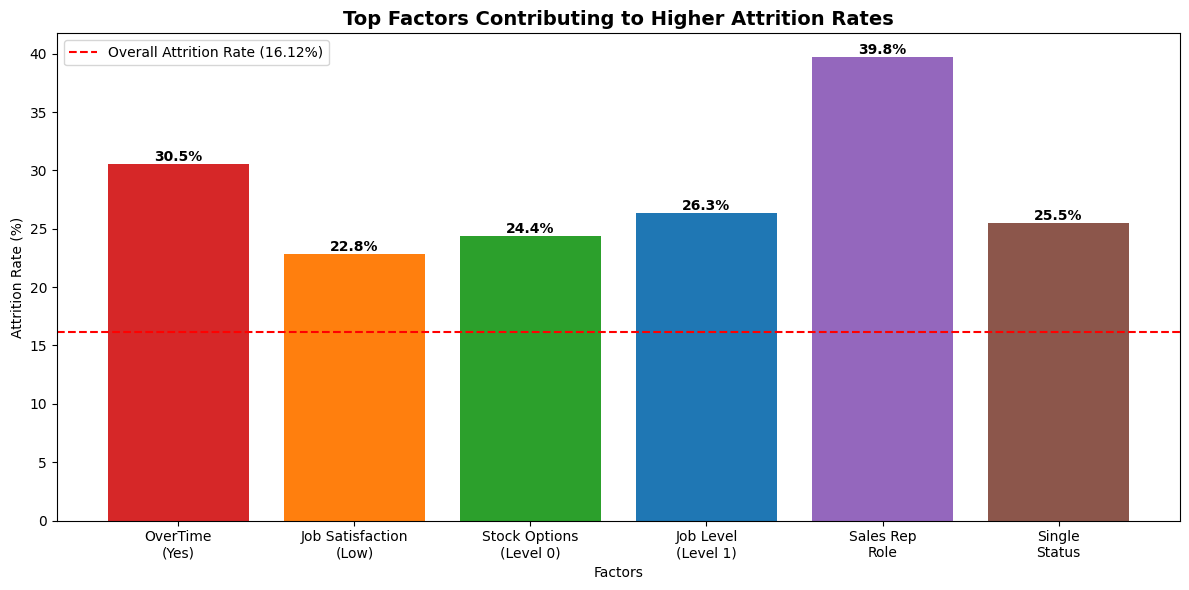

In [35]:
# Creating a summary visualization of top attrition factors
factors = ['OverTime\n(Yes)', 'Job Satisfaction\n(Low)', 'Stock Options\n(Level 0)',
           'Job Level\n(Level 1)', 'Sales Rep\nRole', 'Single\nStatus']

rates = [30.53, 22.84,
         df[df['StockOptionLevel']==0]['Attrition'].value_counts(normalize=True)['Yes']*100,
         df[df['JobLevel']==1]['Attrition'].value_counts(normalize=True)['Yes']*100,
         df[df['JobRole']=='Sales Representative']['Attrition'].value_counts(normalize=True)['Yes']*100,
         df[df['MaritalStatus']=='Single']['Attrition'].value_counts(normalize=True)['Yes']*100]

plt.figure(figsize=(12,6))
bars = plt.bar(factors, rates, color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd', '#8c564b'])
plt.axhline(y=16.12, color='red', linestyle='--', label='Overall Attrition Rate (16.12%)')
plt.title('Top Factors Contributing to Higher Attrition Rates', fontsize=14, fontweight='bold')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Factors')

# Adding value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{rates[i]:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

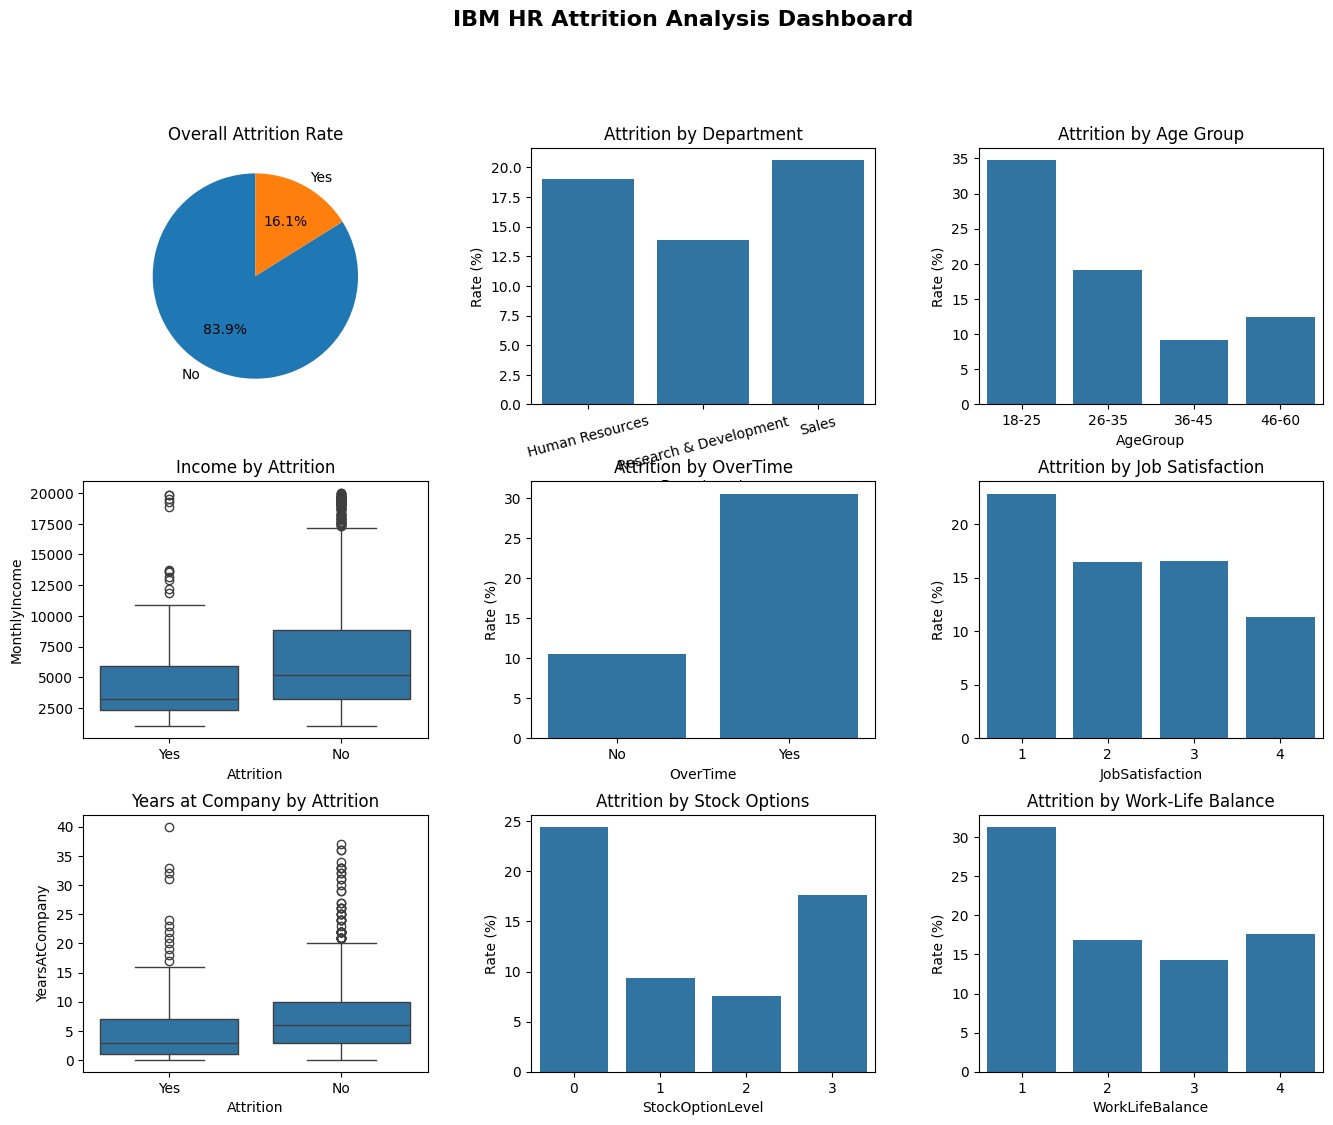

In [36]:
# Creating a comprehensive dashboard of attrition insights
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Attrition rate
ax1 = fig.add_subplot(gs[0, 0])
attrition_counts = df['Attrition'].value_counts()
ax1.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Overall Attrition Rate')

# Plot 2: Attrition by department
ax2 = fig.add_subplot(gs[0, 1])
dept_data = calculate_attrition_rate(df, 'Department')
sns.barplot(data=dept_data, x='Department', y='AttritionRate', ax=ax2)
ax2.set_title('Attrition by Department')
ax2.tick_params(axis='x', rotation=15)
ax2.set_ylabel('Rate (%)')

# Plot 3: Attrition by age group
ax3 = fig.add_subplot(gs[0, 2])
age_data = calculate_attrition_rate(df, 'AgeGroup')
sns.barplot(data=age_data, x='AgeGroup', y='AttritionRate', ax=ax3)
ax3.set_title('Attrition by Age Group')
ax3.set_ylabel('Rate (%)')

# Plot 4: Income distribution
ax4 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=ax4)
ax4.set_title('Income by Attrition')

# Plot 5: Overtime impact
ax5 = fig.add_subplot(gs[1, 1])
overtime_data = calculate_attrition_rate(df, 'OverTime')
sns.barplot(data=overtime_data, x='OverTime', y='AttritionRate', ax=ax5)
ax5.set_title('Attrition by OverTime')
ax5.set_ylabel('Rate (%)')

# Plot 6: Job satisfaction
ax6 = fig.add_subplot(gs[1, 2])
jobsat_data = calculate_attrition_rate(df, 'JobSatisfaction')
sns.barplot(data=jobsat_data, x='JobSatisfaction', y='AttritionRate', ax=ax6)
ax6.set_title('Attrition by Job Satisfaction')
ax6.set_ylabel('Rate (%)')

# Plot 7: Years at company
ax7 = fig.add_subplot(gs[2, 0])
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany', ax=ax7)
ax7.set_title('Years at Company by Attrition')

# Plot 8: Stock options
ax8 = fig.add_subplot(gs[2, 1])
stock_data = calculate_attrition_rate(df, 'StockOptionLevel')
sns.barplot(data=stock_data, x='StockOptionLevel', y='AttritionRate', ax=ax8)
ax8.set_title('Attrition by Stock Options')
ax8.set_ylabel('Rate (%)')

# Plot 9: Work-life balance
ax9 = fig.add_subplot(gs[2, 2])
wlb_data = calculate_attrition_rate(df, 'WorkLifeBalance')
sns.barplot(data=wlb_data, x='WorkLifeBalance', y='AttritionRate', ax=ax9)
ax9.set_title('Attrition by Work-Life Balance')
ax9.set_ylabel('Rate (%)')

fig.suptitle('IBM HR Attrition Analysis Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.show()

In [37]:
# Final recommendations based on analysis
print('RECOMMENDATIONS TO REDUCE EMPLOYEE ATTRITION')
print('='*60)

print('\n1. ADDRESS OVERTIME ISSUES:')
print('   - Employees working overtime have 30.53% attrition rate')
print('   - Recommendation: Better workload distribution and staffing')

print('\n2. IMPROVE COMPENSATION:')
print('   - $2,045 average income gap between leavers and stayers')
print('   - Recommendation: Review and adjust salary structures')

print('\n3. ENHANCE JOB SATISFACTION:')
print('   - Low satisfaction correlates with 22.84% attrition')
print('   - Recommendation: Regular feedback sessions and career development')

print('\n4. FOCUS ON YOUNGER EMPLOYEES:')
print('   - Average age of leavers: 33.61 years')
print('   - Recommendation: Targeted retention programs for younger staff')

print('\n5. STOCK OPTIONS MATTER:')
print('   - Employees with no stock options show highest attrition')
print('   - Recommendation: Expand stock option programs')

print('\n6. SUPPORT SINGLE EMPLOYEES:')
print('   - Single employees have higher attrition rates')
print('   - Recommendation: Flexible benefits and social engagement programs')

print('\n7. SALES REPRESENTATIVES AT RISK:')
print('   - Sales reps show highest attrition among job roles')
print('   - Recommendation: Improve sales team support and incentives')

print('\n8. WORK-LIFE BALANCE:')
print('   - Poor work-life balance increases attrition')
print('   - Recommendation: Flexible work arrangements and wellness programs')

print('\n' + '='*60)
print('Analysis completed successfully!')

RECOMMENDATIONS TO REDUCE EMPLOYEE ATTRITION

1. ADDRESS OVERTIME ISSUES:
   - Employees working overtime have 30.53% attrition rate
   - Recommendation: Better workload distribution and staffing

2. IMPROVE COMPENSATION:
   - $2,045 average income gap between leavers and stayers
   - Recommendation: Review and adjust salary structures

3. ENHANCE JOB SATISFACTION:
   - Low satisfaction correlates with 22.84% attrition
   - Recommendation: Regular feedback sessions and career development

4. FOCUS ON YOUNGER EMPLOYEES:
   - Average age of leavers: 33.61 years
   - Recommendation: Targeted retention programs for younger staff

5. STOCK OPTIONS MATTER:
   - Employees with no stock options show highest attrition
   - Recommendation: Expand stock option programs

6. SUPPORT SINGLE EMPLOYEES:
   - Single employees have higher attrition rates
   - Recommendation: Flexible benefits and social engagement programs

7. SALES REPRESENTATIVES AT RISK:
   - Sales reps show highest attrition among j

In [38]:
# Saving key analysis results to CSV files for future reference
# Creating a summary dataframe with attrition rates by different factors

# Saving attrition rates by various factors
attrition_summary = pd.DataFrame({
    'Factor': ['Overall', 'With Overtime', 'Without Overtime',
               'Low Job Satisfaction', 'High Job Satisfaction',
               'No Stock Options', 'Young Employees (18-25)'],
    'Attrition_Rate': [16.12, 30.53, 10.44, 22.84, 11.33,
                       df[df['StockOptionLevel']==0]['Attrition'].value_counts(normalize=True)['Yes']*100,
                       attrition_rate_age[attrition_rate_age['AgeGroup']=='18-25']['AttritionRate'].values[0]]
})

# Saving to Google Drive
attrition_summary.to_csv('/content/drive/MyDrive/UM_IBM_HR/attrition_summary.csv', index=False)
print('Analysis summary saved to Google Drive!')
print('\nSummary Preview:')
print(attrition_summary)

Analysis summary saved to Google Drive!

Summary Preview:
                    Factor  Attrition_Rate
0                  Overall       16.120000
1            With Overtime       30.530000
2         Without Overtime       10.440000
3     Low Job Satisfaction       22.840000
4    High Job Satisfaction       11.330000
5         No Stock Options       24.405705
6  Young Employees (18-25)       34.782609
